2. 유방암 데이터 - 차원축소, 군집화
      - 10, 5, 2 차원으로 차원축소
      - 원본과 차원축소한 데이터의 분류(앙상블) 정확도 측정
      - 군집화하기
      - 2차원으로 축소한 것은 시각화(오리지날, 군집화 데이터)

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [86]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
cancer = load_breast_cancer()
cancer_std = StandardScaler().fit_transform(cancer.data)

In [87]:
cancer.data.shape

(569, 30)

### 차원축소
- 30차원 --> 10차원, 5차원, 2차원으로 차원축소

In [88]:
# 2차원
from sklearn.decomposition import PCA
pca2 = PCA(2)
cancer_pca2 = pca2.fit_transform(cancer_std)
cancer_pca2[:3]

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ]])

In [89]:
# 5차원
from sklearn.decomposition import PCA
pca5 = PCA(5)
cancer_pca5 = pca5.fit_transform(cancer_std)
cancer_pca5[:3]

array([[ 9.19283683,  1.94858308, -1.12316623,  3.63373108, -1.19510926],
       [ 2.3878018 , -3.76817174, -0.52929273,  1.11826383,  0.62177508],
       [ 5.73389628, -1.0751738 , -0.55174753,  0.91208257, -0.17708623]])

In [90]:
# 10차원
from sklearn.decomposition import PCA
pca10 = PCA(10)
cancer_pca10 = pca10.fit_transform(cancer_std)
cancer_pca10[:3]

array([[ 9.19283683,  1.94858307, -1.12316616,  3.63373092, -1.19511017,
         1.4114244 ,  2.15936948, -0.39839912, -0.15712918, -0.8774264 ],
       [ 2.3878018 , -3.76817174, -0.52929269,  1.11826385,  0.62177501,
         0.02865639,  0.01335825,  0.24098357, -0.71189613,  1.10701462],
       [ 5.73389628, -1.0751738 , -0.55174759,  0.91208269, -0.17708588,
         0.54145213, -0.66816708,  0.09738008,  0.02406583,  0.45428265]])

- 원본과 차원축소한 데이터의 분류(앙상블) 정확도 측정

In [91]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [92]:
# 원본 데이터로 분류
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state = 2022
)
rfc = RandomForestClassifier(random_state = 2022)
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.9790209790209791

In [93]:
# 2개 차원으로 축소한 데이터로 분류
X_train, X_test, y_train, y_test = train_test_split(
    cancer_pca2, cancer.target, stratify = cancer.target, random_state = 2022
)
rfc2 = RandomForestClassifier(random_state = 2022)
rfc2.fit(X_train, y_train)
rfc2.score(X_test, y_test)

0.958041958041958

In [94]:
# 5개 차원으로 축소한 데이터로 분류
X_train, X_test, y_train, y_test = train_test_split(
    cancer_pca5, cancer.target, stratify = cancer.target, random_state = 2022
)
rfc5 = RandomForestClassifier(random_state = 2022)
rfc5.fit(X_train, y_train)
rfc5.score(X_test, y_test)

0.958041958041958

In [95]:
# 10개 차원으로 축소한 데이터로 분류
X_train, X_test, y_train, y_test = train_test_split(
    cancer_pca10, cancer.target, stratify = cancer.target, random_state = 2022
)
rfc10 = RandomForestClassifier(random_state = 2022)
rfc10.fit(X_train, y_train)
rfc10.score(X_test, y_test)

0.9370629370629371

- 군집화하기

In [96]:
cancer = load_breast_cancer()
cancer_std = StandardScaler().fit_transform(cancer.data)

pca = PCA(n_components=2)
cancer_pca = pca.fit_transform(cancer_std)

- K-Means 모델 생성/학습

In [97]:
from sklearn.cluster import KMeans
KMeans().get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 8,
 'n_init': 10,
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [98]:
kmeans = KMeans(n_clusters = 2, random_state = 2022)
kmeans.fit(cancer_std)        #  비지도학습이므로 y값은 제공하지 않음

KMeans(n_clusters=2, random_state=2022)

In [99]:
# 학습 결과
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [100]:
np.unique(kmeans.labels_, return_counts = True)

(array([0, 1], dtype=int32), array([375, 194]))

In [101]:
df = pd.DataFrame({
    'PC1':cancer_pca[:,0], 'PC2':cancer_pca[:,1],
    'target':cancer.target, 'cluster':kmeans.labels_
})
df.head(55).tail(5)

,PC1,PC2,target,cluster
50,-3.542906,-1.282496,1,0
51,-3.157814,-1.688959,1,0
52,-3.450489,-0.498219,1,0
53,3.302551,-1.130938,0,1
54,-0.674619,-2.116410,0,0


In [102]:
# 데이터 분포
df.groupby(['target', 'cluster'])[['PC1']].count()

PC1
target cluster     
0      0         36
       1        176
1      0        339
       1         18

- 군집 결과 시각화

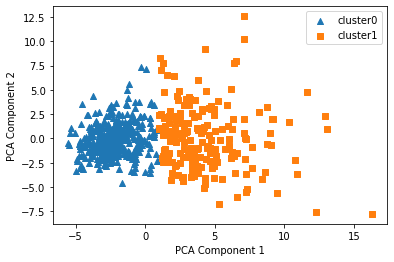

In [103]:
markers = ['^', 's']

for i, marker in enumerate(markers):
  x_data = df[df.cluster == i]['PC1']
  y_data = df[df.cluster == i]['PC2']
  plt.scatter(x_data, y_data, marker = marker, label = 'cluster' + str(i))

plt.legend()
plt.xlabel('PCA Component 1'), plt.ylabel('PCA Component 2')
plt.show()

- 원본 데이터와 군집화된 데이터 비교

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


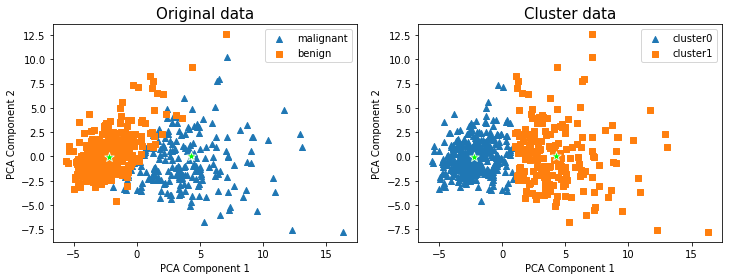

In [112]:
import seaborn as sns
plt.figure(figsize=(12,4))
for k, column in enumerate(['target','cluster']):
    plt.subplot(1, 2, k+1)
    for i, marker in enumerate(markers):
        x_data = df[df[column] == i]['PC1']
        y_data = df[df[column] == i]['PC2']
        if k == 0:
            plt.title('Original data', fontsize=15)
            plt.scatter(x_data, y_data, marker=marker, label=cancer.target_names[i])
        else:
            plt.title('Cluster data', fontsize=15)
            plt.scatter(x_data, y_data, marker=marker, label='cluster' + str(i))
    sns.scatterplot(df.groupby(['cluster'])[['PC1','PC2']].mean()['PC1'],df.groupby(['cluster'])[['PC1','PC2']].mean()['PC2'], 
        data = df.groupby(['cluster'])[['PC1','PC2']].mean(), color='#00FF00', marker = "*", s = 100)
    plt.legend()
    plt.xlabel('PCA Component 1'), plt.ylabel('PCA Component 2')
plt.show()